In [1]:
from __future__ import annotations # for typings

import random
from math import sqrt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## 1

> 1. Для студентов с четным порядковым номером в группе – датасет с
>  [классификацией грибов](https://archive.ics.uci.edu/ml/datasets/Mushroom), а
>  нечетным – [датасет с данными про оценки студентов инженерного и педагогического факультетов](https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation) 
>  (для данного датасета нужно ввести метрику: студент успешный/неуспешный на
>  основании грейда)


У меня 9 номер в группе, поэтому буру датасет про оценки.

In [2]:
ds = pd.read_csv("../res/higher-education-students-performance-evaluation.csv")
ds

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [4]:
ds.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


Видно, что данные распознаны и дополнительная обраобтка не нужна.

Введем метрику "успешности" студента на основании атрибута 'GRADE'. Будем считать, что больше среднего значения получает именно успешный студент.

In [5]:
grade_treshold = (np.min(ds['GRADE']) + np.max(ds['GRADE'])) / 2
ds['SUCC'] = (ds['GRADE'] > grade_treshold).astype(int)
ds.sample(10)

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,COURSE ID,GRADE,SUCC
107,STUDENT108,1,1,2,4,1,1,2,1,1,...,1,2,3,2,1,4,2,7,6,1
129,STUDENT130,1,1,2,3,1,1,2,1,1,...,2,3,2,3,2,2,3,9,3,0
32,STUDENT33,2,1,2,3,2,2,2,2,1,...,1,2,2,2,1,2,3,1,1,0
139,STUDENT140,1,1,2,4,1,2,1,2,2,...,1,2,3,2,1,1,2,9,0,0
68,STUDENT69,2,1,2,4,1,2,2,1,1,...,1,2,2,3,2,4,3,3,5,1
125,STUDENT126,1,1,2,5,1,1,2,1,1,...,2,3,2,3,1,1,3,9,2,0
91,STUDENT92,2,2,2,5,1,1,1,1,1,...,1,2,3,3,2,5,4,6,6,1
92,STUDENT93,1,2,2,3,2,2,2,1,1,...,1,3,2,3,3,2,2,6,7,1
35,STUDENT36,1,2,1,4,2,2,2,3,1,...,1,2,1,3,1,1,1,1,1,0
14,STUDENT15,3,2,2,4,1,1,2,3,4,...,1,2,3,2,1,4,4,1,2,0


# 2

> 2. Отобрать **случайным** образом sqrt(n) признаков

In [6]:
features = list(ds.columns.drop(['STUDENT ID', 'GRADE', 'SUCC']))
target = 'SUCC'
print(f"{features=}")
print(f"{target=}")

features=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', 'COURSE ID']
target='SUCC'


In [7]:
fcs_size = int(sqrt(len(features))) # required sqrt(n) number of feature columns
fcs = [features[i] for i in sorted(random.sample(range(len(features)), fcs_size))]
print(f"{fcs=}") # tuple of features in original order
print(f"{fcs_size=}")

fcs=['4', '18', '25', '26', 'COURSE ID']
fcs_size=5


P.S. позже оказалось что это хорошая выборка признаков: `['4', '18', '25', '26', 'COURSE ID']`.
Другие показывают очень плохой результат.

# 3

> 3. Реализовать без использования сторонних библиотек построение дерева решений
>    (дерево не бинарное, numpy и pandas использовать можно, использовать список
>    списков  для реализации  дерева - нельзя)


Реализуем виды узлов в дереве с помощью ООП:

In [8]:
from abc import ABC
from typing import Generic, TypeVar

F = TypeVar("F") # feature generic type
V = TypeVar("V") # feature available values generic type as "set of values of feature F"
T = TypeVar("T") # target class of prediction: (0, 1) in ds['SUCC']

class DTNode(ABC): 
    """Decision tree abstract node class"""
    INNER = 'inner'
    LEAF = 'leaf'
    def __init__(self, type: str) -> None:
        super().__init__()
        self.nodetype: str = type


class DTInnerNode(DTNode):
    """Decision tree inner node which have some children"""

    def __init__(self, 
                 feature: F, # feature used for split in this node
                 threasholds: list[F], # list of available thresholds
                 children: list[DTNode], # list of children corresponding to list of threasholds
                 gain: float) -> None: # information gain of split in this node
        super().__init__(DTNode.INNER)
        self.feature = feature
        self.threasholds = threasholds
        self.children = children
        self.gain = gain
    

class DTLeafNode(DTNode):
    """Decision tree leaf node which have no children"""

    def __init__(self, value: T) -> None: # value of terminal node in tree
        super().__init__(DTNode.LEAF)
        self.value = value


Для выполнения задания достаточно реализовать дерево решений по *категориальным* признакам (оценки по предметам, по факту *численные дискретные*, но не суть) для *бинарно* признака успешности студента.

In [9]:
class DecisionTreeClassifier():
    def __init__(self, min_samples: int=2, max_depth: int=2) -> None:
        assert min_samples > 0 and max_depth > 0, "parameters can't be negative or zero"
        self.min_samples = min_samples
        self.max_depth = max_depth
    
    def fit(self, X, y) -> None:
        self._root = self._build_tree(X, y)
    
    def predict(self, X) -> pd.Series:
        return pd.Series([self._predict(x, self._root) for i, x in X.iterrows()])
    
    def _build_tree(self, X, y) -> DTNode:
        curr_depth = 1
        return self._build_sub_tree(X, y, curr_depth)
    
    def _build_sub_tree(self, X, y, curr_depth) -> DTNode:
        if len(X) > self.min_samples and curr_depth < self.max_depth:
            feature, thresholds, children_datasets, gain = self._best_split(X, y)

            if gain > 0: # gain can be 0 in worst case
                children = [self._build_sub_tree(X_child, y_child, curr_depth + 1)
                            for X_child, y_child in children_datasets]
                return DTInnerNode(feature, thresholds, children, gain)
        
        return DTLeafNode(self._leaf_value(y))

    def _leaf_value(self, y: pd.Series) -> T:
        return y.value_counts().index[0]

    def _best_split(self, X, y) -> tuple[F, list[V[F]], float, list[pd.DataFrame]]:
        """
        returns tuple of feature name used for best split, 
                available values of this feature (aka thresholds), 
                information gain after split 
                and list of children's datasets for such thresholds
        """
        best_feature = None
        best_thresholds = None
        best_children_datasets = None
        best_info_gain = -1

        for fname in X.columns:
            thresholds = sorted(pd.unique(X[fname]))

            children_datasets = [None for _ in range(len(thresholds))]
            for i in range(len(children_datasets)):
                fts = X[fname] == thresholds[i]
                children_datasets[i] = (X[fts], y[fts])

            ## pandas have broken such nice feature 
            # children_datasets = [(X[fts], y[fts])
            #                      for t in thresholds 
            #                      if (fts := (X[fname] == t))] 

            if len(children_datasets) < 2:
                continue
            
            info_gain = self._info_gain(y, [y for X, y in children_datasets])

            if info_gain > best_info_gain:
                best_feature = fname
                best_thresholds = thresholds
                best_children_datasets = children_datasets
                best_info_gain = info_gain

        return best_feature, best_thresholds, best_children_datasets, best_info_gain

    def _info_gain(self, y_parent, y_children) -> float:
        parent_entropy = self._entropy(y_parent)

        weighted_entropy = 0
        for y_child in y_children:
            weight = len(y_child) / len(y_parent)
            weighted_entropy += weight * self._entropy(y_child)
        
        return parent_entropy - weighted_entropy


    def _entropy(self, y) -> float:
        _, counts = np.unique(y, return_counts=True)
        prob = counts / len(y)
        entropies = -prob * np.log2(prob)

        ## equal to this
        # entropy = 0
        # for value in pd.unique(y):
        #     vprob = np.count_nonzero(y == value) / len(y)
        #     entropy += -vprob * np.log2(vprob)
        
        return np.sum(entropies)

    def _predict(self, x, node: DTNode) -> T:
        if node.nodetype == DTNode.LEAF:
            return node.value

        node: DTInnerNode 

        for i, t in enumerate(node.threasholds):
            check_val = x[node.feature]
            if check_val == t:
                return self._predict(x, node.children[i])

        print(f"value '{check_val}' for feature '{node.feature}' is not presented"
               " in train dataset. Select random next condition for it.")

        return self._predict(x, random.choice(node.children))

Разделим выборку на тренировочну и тестовую

In [10]:
X_train, X_test, y_train, y_test = train_test_split(ds[fcs], ds[target], test_size=0.3, random_state=42)

Проверяем, что всё в нашей модели работает

In [11]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred.sample(5)

value '4' for feature '4' is not presented in train dataset. Select random next condition for it.
value '4' for feature '4' is not presented in train dataset. Select random next condition for it.
value '2' for feature 'COURSE ID' is not presented in train dataset. Select random next condition for it.
value '2' for feature 'COURSE ID' is not presented in train dataset. Select random next condition for it.


16    0
39    1
17    0
29    0
33    0
dtype: int32

Можно заметить, что иногда в тренеровочном датасете не оказывается значений для фичей, которые представлены в тестовом датасете. Важно чтобы таких случаев было не много, а иначе качество модели будет случайным. 

Проверим, правда ли нет такого значения для фичи в тренеровочном и есть в тестовой выборке:

In [12]:
# len(X_train[X_train['9'] == 2]), len(X_test[X_test['9'] == 2]) # правда!

# 4

> 4. Провести оценку реализованного алгоритма с использованием Accuracy, precision и recall


Там как в предыдущей лабе я уже реализовал `my_confusion_matrix` позволю себе не реализовывать ее снова и воспользуюсь онной из `sklearn.metrics`. С помощью матрицы ошибок можно реализовать нужные метрики по формулам:

$$
\mathrm{Accuracy} 
    = \cfrac{\text{correct classification}}{\text{all classifications}} 
    \overset{\text{binary}}{=} \cfrac{TP + TN}{TP + TN + FP + FN}
$$

$$
\mathrm{Precision} 
    = \cfrac{\text{positive data points with positive predicitions}}{\text{all data points with positive predictions}} 
    \overset{\text{binary}}{=} \cfrac{TP}{TP + FP}
$$

$$
\mathrm{Recall} 
    = \cfrac{\text{.......}}{\text{.......}} 
    \overset{\text{binary}}{=} \cfrac{TP}{TP + FN}
$$

In [13]:
def my_accuracy_score(y_test, y_pred):
    c = confusion_matrix(y_test, y_pred)
    return (c[1][1] + c[0][0]) / (c[1][1] + c[0][0] + c[0][1] + c[1][0])

def my_precision_score(y_test, y_pred):
    c = confusion_matrix(y_test, y_pred)
    return c[1][1] / (c[1][1] + c[0][1])

def my_recall_score(y_test, y_pred):
    c = confusion_matrix(y_test, y_pred)
    return c[1][1] / (c[1][1] + c[1][0])

# 5

> 5. Построить кривые AUC-ROC и AUC-PR 

Метрики подсчитываются как правило только для бинарной классификации с вероятностями отношения к классу "1".

Подсчитывать нужные метрики можно разными способами: 
- итеративно для разных диапозонов вероятностей (по увеличению) считать TP, FP
  и потом высчитывать TPR, FPR. Это довольно неэффективно, сложность чето около $O(n^3)$
- отсортировать результаты по вероятности (тестовый и полученный совместно) и
  самостоятельно ручками идти по порядку и считать TP, FP для очередной пары. Это
  некрасиво и результат отличается (похоже на то?) от того что в sklearn, да и к
  тому же должен (согласно wiki и логике) получиться график из двух отрезков.
- отсортировать результаты по вероятности совместно, найти точки, в которых
  меняется соотношение (такие "ступеньки" на графике) и по ним строить график. Это
  эффективно, так делает sklearn и так сделал я.

Реализовали вспомогательную функцию, которая считает нужные TP и TF с помощью numpy-магии.

In [14]:
def _binary_clf_curve(y_test, y_pred):
    """As it works in sklearn"""

    desc_pred_idxs = np.argsort(y_pred)[::-1]
    y_pred_sorted = y_pred[desc_pred_idxs]
    y_test_sorted = y_test[desc_pred_idxs]
    
    # find indices where sorted values change to create such 'stairs' on graph 
    distinct_idxs = np.where(np.diff(y_pred_sorted))[0]
    end = np.array([y_test_sorted.size - 1])
    threshold_idxs = np.hstack((distinct_idxs, end)) # also we need last index

    tps = np.cumsum(y_test_sorted)[threshold_idxs] # take true positives on this 'stairs'
    fps = (1 + threshold_idxs) - tps # just arithmetic calc of remaining values
    thresholds = y_pred_sorted[threshold_idxs] # values on 'stairs'

    return tps, fps, thresholds


def my_roc_auc(y_test: pd.Series, y_pred: pd.Series):
    """As it works in sklearn"""

    # handle different library APIs
    if type(y_test) is pd.Series:
        y_test = y_test.values
    if type(y_pred) is pd.Series:
        y_pred = y_pred.values

    tps, fps, thresholds = _binary_clf_curve(y_test, y_pred)

    # calculate rate and append 0 for good graph drawing
    tpr = np.hstack((0, tps / tps[-1])) 
    fpr = np.hstack((0, fps / fps[-1]))

    return tpr, fpr, thresholds


def my_roc_pr(y_test, y_pred):
    """As it works in sklearn"""

    if type(y_test) is pd.Series:
        y_test = y_test.values
    if type(y_pred) is pd.Series:
        y_pred = y_pred.values

    tps, fps, thresholds = _binary_clf_curve(y_test, y_pred)

    precision = tps / (tps + fps)

    # When no positive label in y_true, recall is set to 1 for all thresholds
    if tps[-1] == 0:
        recall = np.ones_like(tps)
    else: 
        recall = tps / tps[-1]

    # reverse the outputs so recall is decreasing
    sl = slice(None, None, -1)
    return np.hstack((precision[sl], 1)), np.hstack((recall[sl], 0)), thresholds[sl]


Проверим, что мы получаем в своей реализации:

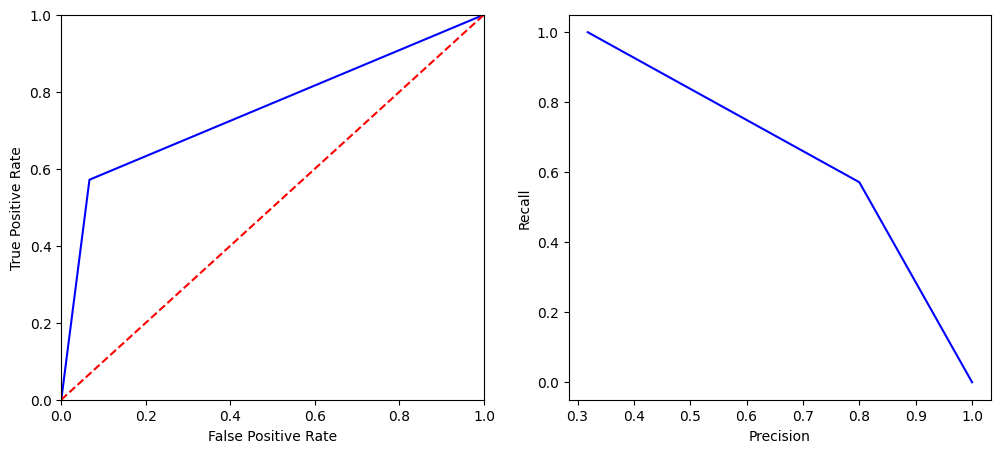

In [15]:
plt.figure(figsize=(12, 5))

tpr, fpr, _ = my_roc_auc(y_test, y_pred)
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


pr, rc, _ = my_roc_pr(y_test, y_pred)
plt.subplot(1, 2, 2)
plt.plot(pr, rc, 'b')
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.show()

И что в Sklearn

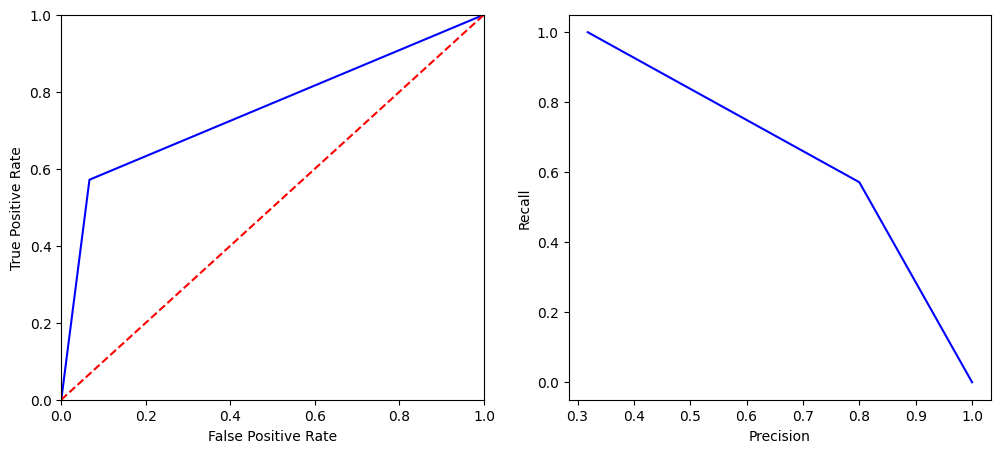

In [16]:
from sklearn.metrics import roc_curve, precision_recall_curve
plt.figure(figsize=(12, 5))

fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

pr, rc, threshold = precision_recall_curve(y_test, y_pred)
plt.subplot(1, 2, 2)
plt.plot(pr, rc, 'b')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

Как можно видеть, графики очень похожи, что не удивительно. Мы получаем верное представление ROC-AUC и PR-AUC кривых для бинарной классификации.

Так же можно еще добавить возможность подсчета площади под графиком, но в задание это не входит. Но делается это не сложно с помощью `np.sum` и `np.trapz`.

Для интереса сравним нашу модель и sklearn по метрике `roc_auc_score`

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
model_sklearn = DecisionTreeClassifier(min_samples_leaf=2,max_depth=5).fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)

roc_auc_score(y_test, y_pred), roc_auc_score(y_test, y_pred_sklearn)

(0.7523809523809524, 0.7166666666666667)

Видно, что результат довольно хороший и даже бывает лучше библиотечного. Однако,
возможно это результат переобучения, т.к. 5 признаков и такая же глубина дерева,
изначальный датасет не очень большой как и полученная тестовая выборка.

Так же оказывается, что результат меняется кардинально при выборе других случайных признаков для классификации.